In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

### Постройте гистограмму выборки и теоретическую плотность распределения

In [39]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(1000)
sample[:20]

array([1.62279883, 2.10149951, 2.36406759, 2.98619699, 1.2287717 ,
       1.92261652, 1.61097132, 1.43317975, 1.06085257, 1.30844571,
       1.66764057, 1.62783716, 1.84925609, 1.87998528, 2.19830927,
       1.48290347, 1.91942353, 1.04687226, 3.92501946, 1.11526611])

In [12]:
sample.dtype

dtype('float64')

In [13]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_mean

1.5957691216057308

In [14]:
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины
real_var

0.45352091052967447

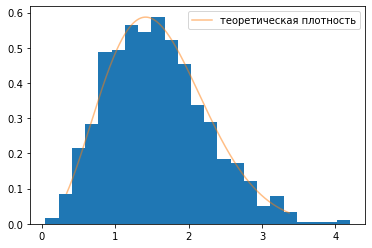

In [40]:
# ваш код тут
plt.hist(sample,bins='auto', density=True)
x = np.linspace(sts.maxwell.ppf(0.01),sts.maxwell.ppf(0.99), 1000)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

### Оценим распределение выборочного среднего для разных объёмов выборок

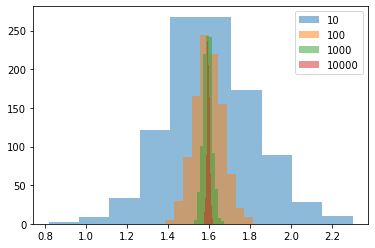

In [41]:
# plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

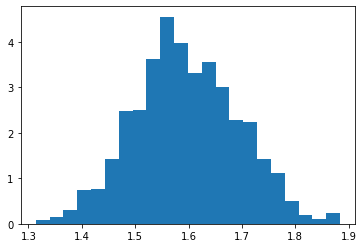

In [36]:
N = 50 #выборка
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(maxwell_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');

[]

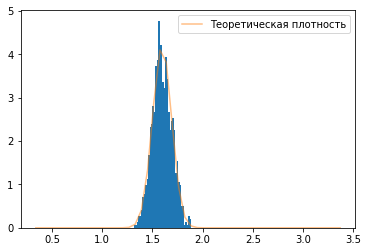

In [37]:
norm_rv = sts.norm(loc = maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(sts.maxwell.ppf(0.01),sts.maxwell.ppf(0.99), N)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

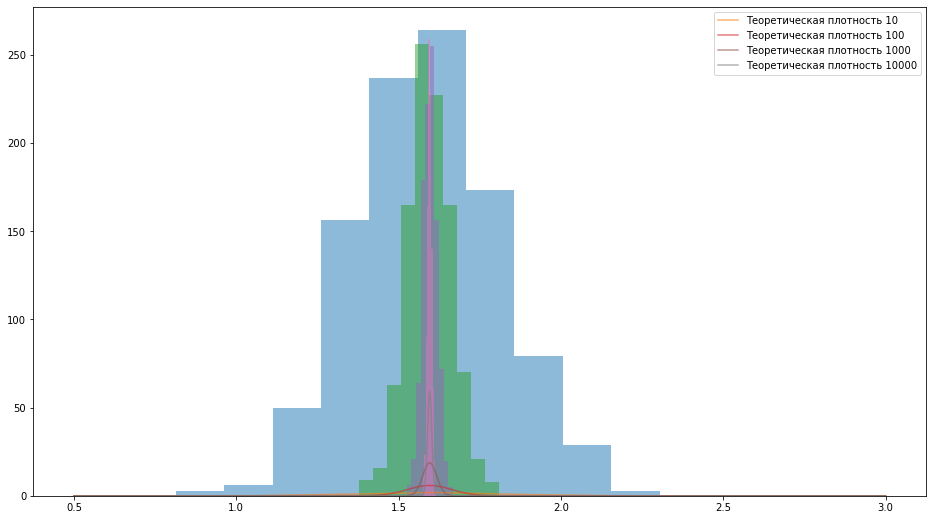

In [33]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    norm_rv = sts.norm(loc = maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))            
    plt.hist(means, alpha=0.5)
    x = np.linspace(0.5,3, N)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность '+str(N), alpha=0.6 )
    plt.legend()
# plt.plot()
# plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
Ваш ответ:
Для выбранного распределения maxwell апроксимация распределения выборочного среднего работает хорошо!

## Доверительный интервал на основе ЦПТ

In [54]:
# Импортируем нужные библиотеки для реализации следующей ячейки
from statsmodels.stats.weightstats import _zconfint_generic
import statsmodels.stats.weightstats as ssw

df = pd.read_csv("telecom_churn.csv",sep = ';').reset_index()
df_w = df[['total day calls', 'churn']]
df_w.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [56]:
# df_used - те кто остался в телеком компании
df_used = df_w.loc[df_w["churn"] == False]

# Статсистика по срезу df_used['total day calls']
ser_used = df_used['total day calls']
print('Мат.ожидание',ser_used.mean())
print("Дисперсия", ser_used.var())
print("Стандартное отклонеине", ser_used.std())

Мат.ожидание 100.28315789473685
Дисперсия 392.08581663003537
Стандартное отклонеине 19.801156951805503


In [61]:
N = ser_used.count()
print("Задание 1. Доверительный интервал по цпт: [{}, {}] ".format(
    np.mean(ser_used) - 1.96 * ser_used.std() / np.sqrt(N-1), np.mean(ser_used) + 1.96 * ser_used.std() / np.sqrt(N-1) 
))

print("Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc = np.mean(ser_used), scale = np.std(ser_used, ddof = 1)/np.sqrt(N-1))
))

print("Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(ser_used),  np.std(ser_used, ddof = 1), alpha=0.95, alternative='two-sided')
))

Задание 1. Доверительный интервал по цпт: [99.55604740026511, 101.01026838920858] 
Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: (99.55606076109109, 101.0102550283826) 
Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


In [63]:
# df_noused - те кто покинул телеком компании
df_noused = df_w.loc[df_w["churn"] != False]

# Статсистика по срезу df_noused['total day calls']
ser_noused = df_noused['total day calls']
print('Мат.ожидание',ser_noused.mean())
print("Дисперсия", ser_noused.var())
print("Стандартное отклонеине", ser_noused.std())

Мат.ожидание 101.33540372670808
Дисперсия 465.79598463957115
Стандартное отклонеине 21.58230721307551


In [64]:
N = ser_noused.count()
print("Задание 1. Доверительный интервал по цпт: [{}, {}] ".format(
    np.mean(ser_noused) - 1.96 * ser_noused.std() / np.sqrt(N-1), np.mean(ser_noused) + 1.96 * ser_noused.std() / np.sqrt(N-1) 
))

print("Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(ser_noused), 
                      scale=np.std(ser_noused, ddof = 1)/np.sqrt(N-1))
))

print("Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(ser_noused),  np.std(ser_noused, ddof = 1), alpha=0.95, alternative='two-sided')
))

Задание 1. Доверительный интервал по цпт: [99.40863130099713, 103.26217615241903] 
Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: (99.40866670589261, 103.26214074752355) 
Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
